In [2]:
import pandas as pd
from glob import glob

shuffled_peak_with_sequence_filepaths = glob('/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/7_shuffled_confident_peaks/*/*with_sequence.bed')


In [54]:
rbfox2_to_plot_together_label = ['RBFOX2_ai_FOX2-MinA',
                                 'RBFOX2_ai_MinA_alone',
                                 'RBFOX2_ai_FOX2-8e',
                                  'RBFOX2_ai_8e_alone',
                                  'RBFOX2_ct_FOX2-APOBEC1',
                                  'RBFOX2_ct_APOBEC1_alone',
                                  'RBFOX2_both_FOX2-P0078',
                                  'RBFOX2_both_P0078_alone']

slbp_to_plot_together_label = ['SLBP_ai_SLBP-MinA',
                                 'SLBP_ai_MinA_Only',
                                 'SLBP_ai_SLBP-8e',
                                  'SLBP_ai_8e_Only',
                                  'SLBP_ct_SLBP-APOBEC1',
                                  'SLBP_ct_APOBEC1_Only',
                                  'SLBP_both_SLBP-P0078',
                                  'SLBP_both_P0078_Only']

rbfox2_to_plot_together_label_cleaned = ['RBFOX2_ai_FOX2-MinA_cleaned',
                          'RBFOX2_ai_FOX2-MinA',
                          'RBFOX2_ai_FOX2-8e_cleaned',
                          'RBFOX2_ai_FOX2-8e',
                          'RBFOX2_ct_FOX2-APOBEC1_cleaned',
                          'RBFOX2_ct_FOX2-APOBEC1',
                          'RBFOX2_both_FOX2-P0078_cleaned',
                          'RBFOX2_both_FOX2-P0078'
                         ]


In [51]:
rbfox2_shuffles = [f for f in shuffled_peak_with_sequence_filepaths if f.split('/')[-1].split('_shuffle')[0] in rbfox2_to_plot_together_label]
len(rbfox2_shuffles)

160

In [52]:
rbfox2_cleaned_shuffles = [f for f in shuffled_peak_with_sequence_filepaths if f.split('/')[-1].split('_shuffle')[0] in rbfox2_to_plot_together_label_cleaned]
len(rbfox2_cleaned_shuffles)

160

In [6]:
slbp_shuffles = [f for f in shuffled_peak_with_sequence_filepaths if f.split('/')[-1].split('_shuffle')[0] in slbp_to_plot_together_label]
len(slbp_shuffles)

160

# Load eCLIPs

In [7]:
import pybedtools

def load_eclip(filepath, l2fc_threshold=2, l10p_threshold=3):
    print(filepath)
    eclip_df = pd.read_csv(filepath,
                               sep='\t'
                               )

    total_columns = len(eclip_df.columns)
    
    eclip_df.columns=['chrom', 'start', 'end', 'l2fc', 'l10p', 'strand'] + [i for i in range(total_columns - 6)]
    print('\tBefore filter:', len(eclip_df))

    if 'region' in eclip_df.columns:
        eclip_df = eclip_df[~eclip_df.region.isin([
            'distintron500', 'proxintron500', 'distnoncoding_intron500', 'proxnoncoding_intron500', 'intergenic'
        ])]
        
    eclip_df = eclip_df[(eclip_df.l2fc > l2fc_threshold) & (eclip_df.l10p > l10p_threshold)]
    
    eclip_df['chrom'] = [i.split('chr')[1] for i in eclip_df.chrom]
    print('\tAfter filter: ', len(eclip_df))
    eclip_bed = pybedtools.BedTool.from_dataframe(eclip_df)

    return eclip_bed


overall_path = '/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs'

slbp_native_path = '{}/SLBP_BP_native_bed.annotated'.format(overall_path)
slbp_cterm_rep1_path = '{}/SLBP_CTerminus_1.bed.annotated'.format(overall_path)
slbp_cterm_rep2_path = '{}/SLBP_CTerminus_2.bed.annotated'.format(overall_path)
rbfox2_native_path = '{}/RBFOX2_native_eclip.bed.annotated'.format(overall_path)
rbfox2_cterm_path = '{}/RBFOX2_CTerminus_1.bed.annotated'.format(overall_path)

eclips = {
    'slbp_native': load_eclip(slbp_native_path),
    'slbp_cterm_rep1': load_eclip(slbp_cterm_rep1_path),
    'slbp_cterm_rep2': load_eclip(slbp_cterm_rep2_path),
    'rbfox2_native': load_eclip(rbfox2_native_path),
    'rbfox2_cterm': load_eclip(rbfox2_cterm_path)
}

/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/SLBP_BP_native_bed.annotated
	Before filter: 156
	After filter:  156
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/SLBP_CTerminus_1.bed.annotated
	Before filter: 177948
	After filter:  3551
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/SLBP_CTerminus_2.bed.annotated
	Before filter: 166162
	After filter:  2986
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/RBFOX2_native_eclip.bed.annotated
	Before filter: 74853
	After filter:  8750
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/reference/hg38_eCLIPs/RBFOX2_CTerminus_1.bed.annotated
	Before filter: 263128
	After filter:  16870


# Calculate actual overlaps 

In [8]:
actual_rbfox2 = [f for f in glob('6_overlapped_confident_peaks/*') if f.split('/')[-1].split('.tsv')[0] in rbfox2_to_plot_together_label]
actual_rbfox2

['6_overlapped_confident_peaks/RBFOX2_both_FOX2-P0078.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ai_FOX2-MinA.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ct_APOBEC1_alone.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ai_MinA_alone.tsv',
 '6_overlapped_confident_peaks/RBFOX2_both_P0078_alone.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ai_FOX2-8e.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ct_FOX2-APOBEC1.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ai_8e_alone.tsv']

In [9]:
actual_rbfox2_cleaned = [f for f in glob('6_overlapped_confident_peaks/*') if f.split('/')[-1].split('.tsv')[0] in rbfox2_to_plot_together_label_cleaned]
actual_rbfox2_cleaned

['6_overlapped_confident_peaks/RBFOX2_ai_FOX2-8e_cleaned.tsv',
 '6_overlapped_confident_peaks/RBFOX2_both_FOX2-P0078.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ai_FOX2-MinA.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ct_FOX2-APOBEC1_cleaned.tsv',
 '6_overlapped_confident_peaks/RBFOX2_both_FOX2-P0078_cleaned.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ai_FOX2-8e.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ai_FOX2-MinA_cleaned.tsv',
 '6_overlapped_confident_peaks/RBFOX2_ct_FOX2-APOBEC1.tsv']

In [10]:
actual_slbp = [f for f in glob('6_overlapped_confident_peaks/*') if f.split('/')[-1].split('.tsv')[0] in slbp_to_plot_together_label]
actual_slbp

['6_overlapped_confident_peaks/SLBP_ct_SLBP-APOBEC1.tsv',
 '6_overlapped_confident_peaks/SLBP_ai_8e_Only.tsv',
 '6_overlapped_confident_peaks/SLBP_ai_SLBP-8e.tsv',
 '6_overlapped_confident_peaks/SLBP_both_SLBP-P0078.tsv',
 '6_overlapped_confident_peaks/SLBP_both_P0078_Only.tsv',
 '6_overlapped_confident_peaks/SLBP_ai_MinA_Only.tsv',
 '6_overlapped_confident_peaks/SLBP_ct_APOBEC1_Only.tsv',
 '6_overlapped_confident_peaks/SLBP_ai_SLBP-MinA.tsv']

In [11]:
def calculate_bed_intersection_fraction(stamp_bed, eclip_bed):
    intersection = stamp_bed.intersect(eclip_bed, s=True, u=True)
    fraction_overlapped_by_eclip = len(intersection)/len(stamp_bed)
    return fraction_overlapped_by_eclip

In [12]:
from collections import defaultdict

rbfox2_actual_intersection_values = defaultdict(lambda:{})

for rbfox2_file in actual_rbfox2:
    print(rbfox2_file)
    rbfox2_label = rbfox2_file.split('/')[-1].split('.tsv')[0]
    rbfox2_df = pd.read_csv(rbfox2_file, sep='\t', index_col=0)
    print(len(rbfox2_df))
    #rbfox2_df = rbfox2_df[rbfox2_df.score > .9999]
    print(len(rbfox2_df))
    print()
    rbfox2_bed = pybedtools.BedTool.from_dataframe(rbfox2_df)
    
    #rbfox2_bed = rbfox2_bed.slop(b=75, g='/projects/ps-yeolab3/ekofman/ReferenceData/hg38/cellranger-GRCh38-3.0.0/star/chrNameLength.txt')

    for eclip_comparison in ['rbfox2_cterm', 'rbfox2_native']:
        rbfox2_actual_intersection_values[rbfox2_label][eclip_comparison] = calculate_bed_intersection_fraction(rbfox2_bed, 
                                                                                                                eclips.get(eclip_comparison))

6_overlapped_confident_peaks/RBFOX2_both_FOX2-P0078.tsv
5476
5476

6_overlapped_confident_peaks/RBFOX2_ai_FOX2-MinA.tsv
933
933

6_overlapped_confident_peaks/RBFOX2_ct_APOBEC1_alone.tsv
2047
2047

6_overlapped_confident_peaks/RBFOX2_ai_MinA_alone.tsv
545
545

6_overlapped_confident_peaks/RBFOX2_both_P0078_alone.tsv
6667
6667

6_overlapped_confident_peaks/RBFOX2_ai_FOX2-8e.tsv
9403
9403

6_overlapped_confident_peaks/RBFOX2_ct_FOX2-APOBEC1.tsv
2257
2257

6_overlapped_confident_peaks/RBFOX2_ai_8e_alone.tsv
10809
10809



In [13]:
actual_rbfox2_intersection_df = pd.DataFrame(rbfox2_actual_intersection_values)
actual_rbfox2_intersection_df

,RBFOX2_both_FOX2-P0078,RBFOX2_ai_FOX2-MinA,RBFOX2_ct_APOBEC1_alone,RBFOX2_ai_MinA_alone,RBFOX2_both_P0078_alone,RBFOX2_ai_FOX2-8e,RBFOX2_ct_FOX2-APOBEC1,RBFOX2_ai_8e_alone
rbfox2_cterm,0.130570,0.260450,0.139228,0.031193,0.050997,0.150058,0.260080,0.082061
rbfox2_native,0.006209,0.020364,0.005374,0.000000,0.000600,0.013400,0.008418,0.002035


In [14]:
from collections import defaultdict

rbfox2_actual_intersection_values_cleaned = defaultdict(lambda:{})

for rbfox2_file in actual_rbfox2_cleaned:
    print(rbfox2_file)
    rbfox2_label = rbfox2_file.split('/')[-1].split('.tsv')[0]
    rbfox2_df = pd.read_csv(rbfox2_file, sep='\t', index_col=0)
    print(len(rbfox2_df))
    #rbfox2_df = rbfox2_df[rbfox2_df.score > .9999]
    print(len(rbfox2_df))
    print()
    rbfox2_bed = pybedtools.BedTool.from_dataframe(rbfox2_df)
    
    #rbfox2_bed = rbfox2_bed.slop(b=75, g='/projects/ps-yeolab3/ekofman/ReferenceData/hg38/cellranger-GRCh38-3.0.0/star/chrNameLength.txt')

    for eclip_comparison in ['rbfox2_cterm', 'rbfox2_native']:
        rbfox2_actual_intersection_values_cleaned[rbfox2_label][eclip_comparison] = calculate_bed_intersection_fraction(rbfox2_bed, 
                                                                                                                eclips.get(eclip_comparison))

6_overlapped_confident_peaks/RBFOX2_ai_FOX2-8e_cleaned.tsv
7882
7882

6_overlapped_confident_peaks/RBFOX2_both_FOX2-P0078.tsv
5476
5476

6_overlapped_confident_peaks/RBFOX2_ai_FOX2-MinA.tsv
933
933

6_overlapped_confident_peaks/RBFOX2_ct_FOX2-APOBEC1_cleaned.tsv
1897
1897

6_overlapped_confident_peaks/RBFOX2_both_FOX2-P0078_cleaned.tsv
4003
4003

6_overlapped_confident_peaks/RBFOX2_ai_FOX2-8e.tsv
9403
9403

6_overlapped_confident_peaks/RBFOX2_ai_FOX2-MinA_cleaned.tsv
736
736

6_overlapped_confident_peaks/RBFOX2_ct_FOX2-APOBEC1.tsv
2257
2257



In [15]:
actual_rbfox2_intersection_df_cleaned = pd.DataFrame(rbfox2_actual_intersection_values_cleaned)
actual_rbfox2_intersection_df_cleaned

,RBFOX2_ai_FOX2-8e_cleaned,RBFOX2_both_FOX2-P0078,RBFOX2_ai_FOX2-MinA,RBFOX2_ct_FOX2-APOBEC1_cleaned,RBFOX2_both_FOX2-P0078_cleaned,RBFOX2_ai_FOX2-8e,RBFOX2_ai_FOX2-MinA_cleaned,RBFOX2_ct_FOX2-APOBEC1
rbfox2_cterm,0.160365,0.130570,0.260450,0.274644,0.155883,0.150058,0.319293,0.260080
rbfox2_native,0.015478,0.006209,0.020364,0.009489,0.007744,0.013400,0.024457,0.008418


In [16]:
slbp_actual_intersection_values = defaultdict(lambda:{})
for slbp_file in actual_slbp:
    slbp_label = slbp_file.split('/')[-1].split('.tsv')[0]
    slbp_df = pd.read_csv(slbp_file, sep='\t', index_col=0)
    slbp_bed = pybedtools.BedTool.from_dataframe(slbp_df)
    for eclip_comparison in ['slbp_cterm_rep1', 'slbp_cterm_rep2', 'slbp_native']:
        slbp_actual_intersection_values[slbp_label][eclip_comparison] = calculate_bed_intersection_fraction(slbp_bed, 
                                                                                                                eclips.get(eclip_comparison))

In [17]:
pd.DataFrame(slbp_actual_intersection_values)

,SLBP_ct_SLBP-APOBEC1,SLBP_ai_8e_Only,SLBP_ai_SLBP-8e,SLBP_both_SLBP-P0078,SLBP_both_P0078_Only,SLBP_ai_MinA_Only,SLBP_ct_APOBEC1_Only,SLBP_ai_SLBP-MinA
slbp_cterm_rep1,0.004488,0.006638,0.009386,0.007730,0.009462,0.001634,0.001753,0.001802
slbp_cterm_rep2,0.004488,0.005170,0.005776,0.006803,0.006481,0.000000,0.002805,0.000601
slbp_native,0.001496,0.000447,0.014440,0.005566,0.001296,0.000817,0.000701,0.000601


# Shuffled overlaps

In [18]:
from collections import defaultdict 

overlaps_for_rbfox2_shuffles = defaultdict(lambda:defaultdict(lambda:[]))
overlaps_for_rbfox2_shuffles_cleaned = defaultdict(lambda:defaultdict(lambda:[]))

In [19]:
for shuffle in rbfox2_shuffles:
    rbfox2_label = shuffle.split('/')[-2]
    stamp_shuffle_bed = pybedtools.BedTool.from_dataframe(pd.read_csv(shuffle, sep='\t')[['chrom', 'start', 'end', 'strand', 'strand', 'strand']])
    
    #stamp_shuffle_bed = stamp_shuffle_bed.slop(b=75, g='/projects/ps-yeolab3/ekofman/ReferenceData/hg38/cellranger-GRCh38-3.0.0/star/chrNameLength.txt')
    for eclip_comparison in ['rbfox2_cterm', 'rbfox2_native']:
        overlaps_for_rbfox2_shuffles[rbfox2_label][eclip_comparison].append(calculate_bed_intersection_fraction(stamp_shuffle_bed,
                                                                                                           eclips.get(eclip_comparison)))

In [20]:
print('cleaned')      
for shuffle in rbfox2_cleaned_shuffles:
    rbfox2_label = shuffle.split('/')[-2]
    stamp_shuffle_bed = pybedtools.BedTool.from_dataframe(pd.read_csv(shuffle, sep='\t')[['chrom', 'start', 'end', 'strand', 'strand', 'strand']])
    
    #stamp_shuffle_bed = stamp_shuffle_bed.slop(b=75, g='/projects/ps-yeolab3/ekofman/ReferenceData/hg38/cellranger-GRCh38-3.0.0/star/chrNameLength.txt')
    for eclip_comparison in ['rbfox2_cterm', 'rbfox2_native']:
        overlaps_for_rbfox2_shuffles_cleaned[rbfox2_label][eclip_comparison].append(calculate_bed_intersection_fraction(stamp_shuffle_bed,
                                                                                                           eclips.get(eclip_comparison)))

cleaned


# Plot

In [55]:

values_list_rbfox2_native = []
values_list_rbfox2_cterm = []
labels_list_rbfox2_native = []
labels_list_rbfox2_cterm = []


for label in rbfox2_to_plot_together_label:
    print(label)
    if label in overlaps_for_rbfox2_shuffles.keys():
        df_for_label = pd.DataFrame(overlaps_for_rbfox2_shuffles.get(label))
        values_list_rbfox2_native.append(df_for_label['rbfox2_native'].tolist())
        values_list_rbfox2_cterm.append(df_for_label['rbfox2_cterm'].tolist())

        labels_list_rbfox2_native.append(label)
        labels_list_rbfox2_cterm.append(label)
    else:
        print('{} not present'.format(label))
        
        
values_list_rbfox2_native_cleaned = []
values_list_rbfox2_cterm_cleaned = []
labels_list_rbfox2_native_cleaned = []
labels_list_rbfox2_cterm_cleaned = []

for label in rbfox2_to_plot_together_label_cleaned:
    print(label)
    if label in overlaps_for_rbfox2_shuffles_cleaned.keys():
        df_for_label = pd.DataFrame(overlaps_for_rbfox2_shuffles_cleaned.get(label))
        values_list_rbfox2_native_cleaned.append(df_for_label['rbfox2_native'].tolist())
        values_list_rbfox2_cterm_cleaned.append(df_for_label['rbfox2_cterm'].tolist())

        labels_list_rbfox2_native_cleaned.append(label)
        labels_list_rbfox2_cterm_cleaned.append(label)
    else:
        print('{} not present'.format(label))

RBFOX2_ai_FOX2-MinA
RBFOX2_ai_MinA_alone
RBFOX2_ai_FOX2-8e
RBFOX2_ai_8e_alone
RBFOX2_ct_FOX2-APOBEC1
RBFOX2_ct_APOBEC1_alone
RBFOX2_both_FOX2-P0078
RBFOX2_both_P0078_alone
RBFOX2_ai_FOX2-MinA_cleaned
RBFOX2_ai_FOX2-MinA
RBFOX2_ai_FOX2-8e_cleaned
RBFOX2_ai_FOX2-8e
RBFOX2_ct_FOX2-APOBEC1_cleaned
RBFOX2_ct_FOX2-APOBEC1
RBFOX2_both_FOX2-P0078_cleaned
RBFOX2_both_FOX2-P0078


In [56]:
for k,v in rbfox2_actual_intersection_values.items():
    rbfox2_actual_intersection_values_cleaned[k] = v

In [62]:
rbfox2_to_plot_together_label_cleaned_only = [
    'RBFOX2_ai_FOX2-MinA_cleaned',
    'RBFOX2_ai_FOX2-8e_cleaned',
    'RBFOX2_ct_FOX2-APOBEC1_cleaned',
    'RBFOX2_both_FOX2-P0078_cleaned'
]

cleaned_only_values = []
for l in rbfox2_to_plot_together_label_cleaned_only:
    print(l)
    cleaned_only_values.append(pd.DataFrame(overlaps_for_rbfox2_shuffles_cleaned.get(label))['rbfox2_cterm'].tolist())
print(len(cleaned_only_values))

RBFOX2_ai_FOX2-MinA_cleaned
RBFOX2_ai_FOX2-8e_cleaned
RBFOX2_ct_FOX2-APOBEC1_cleaned
RBFOX2_both_FOX2-P0078_cleaned
4


In [68]:
figures_directory = '/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/Figures/RBFOX2_eclip_overlap_permutations/'

/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/Figures/RBFOX2_eclip_overlap_permutations//C_Terminus_eCLIP
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/Figures/RBFOX2_eclip_overlap_permutations//C_Terminus_eCLIP_subtracting_enzyme_only_comparison
/projects/ps-yeolab3/ekofman/Hugo/Full_RBFOX2_and_SLBP/Figures/RBFOX2_eclip_overlap_permutations//C_Terminus_eCLIP_enzyme_only_subtracted


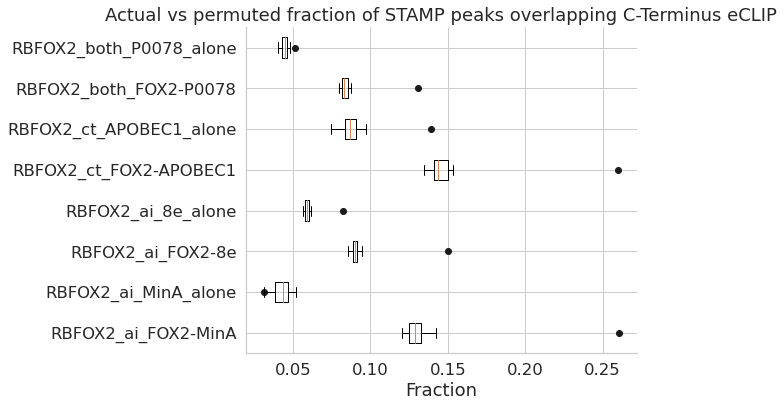

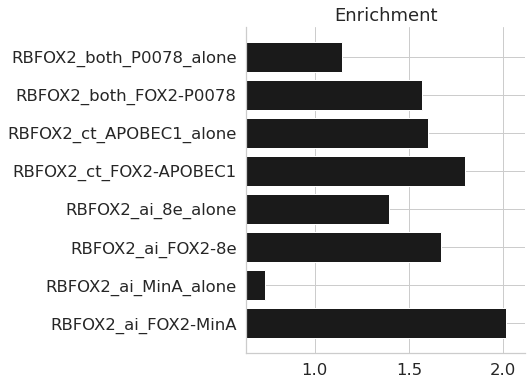

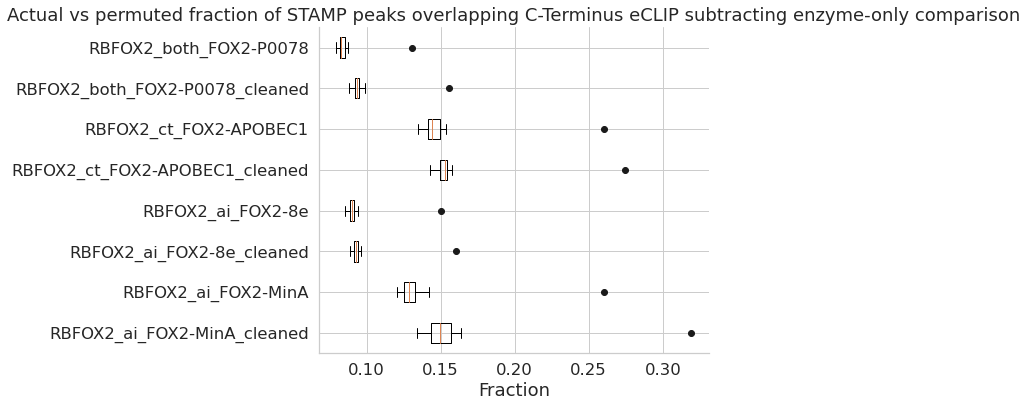

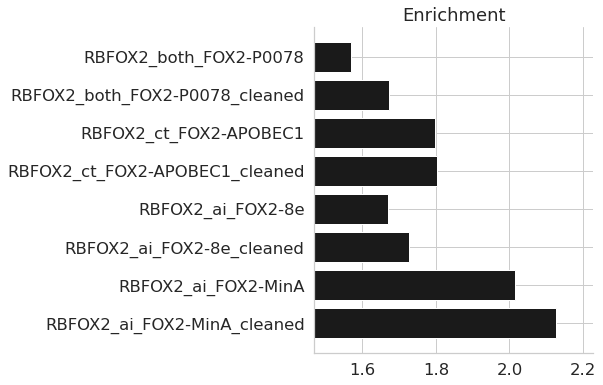

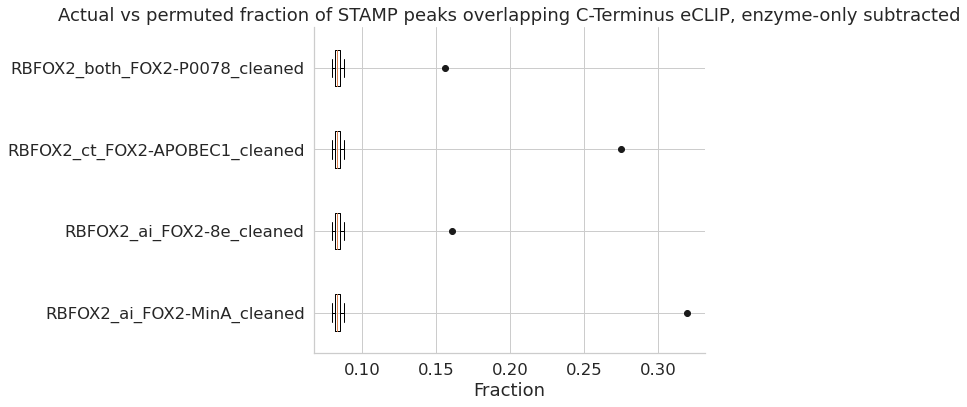

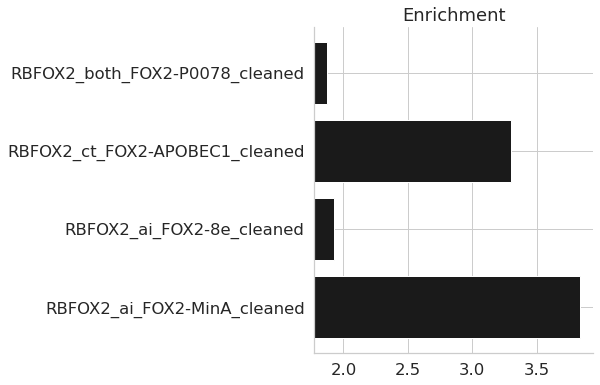

In [71]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

for labels, values, category, title in zip(
    [labels_list_rbfox2_cterm, labels_list_rbfox2_native, labels_list_rbfox2_cterm_cleaned, labels_list_rbfox2_native_cleaned, rbfox2_to_plot_together_label_cleaned_only], 
    [values_list_rbfox2_cterm, values_list_rbfox2_native, values_list_rbfox2_cterm_cleaned, values_list_rbfox2_native_cleaned, cleaned_only_values],
    ['rbfox2_cterm', 'rbfox2_native', 'rbfox2_cterm', 'rbfox2_native', 'rbfox2_cterm'],
    ['C-Terminus eCLIP', 'Native eCLIP', 'C-Terminus eCLIP subtracting enzyme-only comparison', 'Native eCLIP, enzyme-only subtracted', 'C-Terminus eCLIP, enzyme-only subtracted'],
):
    #print(label, '\n\t', category)
    if category == 'rbfox2_cterm':
        
        filename = title.replace('-', '_').replace(' ', '_').replace(',', '')
        filename = '{}/{}'.format(figures_directory, filename)
        print(filename)
        
        custom_params = {"axes.spines.right": False, "axes.spines.top": False}
        sns.set_theme(style="whitegrid", rc=custom_params, font_scale=1.5)

        plt.figure(figsize=(7, 6))

        tick_labels = labels
        range_array= [i+1 for i in range(len(labels))]

        a = plt.boxplot(values, vert=False, showfliers=False)

        b = plt.scatter([actual_values.get(l).get(category) for l in tick_labels], range_array, color='k')
        plt.xlabel("Fraction")
        plt.title("Actual vs permuted fraction of STAMP peaks overlapping {}".format(title))
        c = plt.yticks(range_array, tick_labels)
        
        plt.savefig('{}-box.png'.format(filename), bbox_inches='tight')
        plt.savefig('{}-box.svg'.format(filename), bbox_inches='tight')

        motif_odds_ratios = {}
        for label, peak_set in zip(labels, values):
            permuted_val = np.mean(peak_set)
            actual_val = rbfox2_actual_intersection_values_cleaned.get(label).get('rbfox2_cterm')

            motif_odds_ratios[label] = actual_val/permuted_val

        ordered_motif_ors = []
        for o in tick_labels:
            ordered_motif_ors.append(motif_odds_ratios.get(o))

        plt.figure(figsize=(5, 6))
        plt.barh(tick_labels, ordered_motif_ors, color='k')
        
        min_val = np.min(ordered_motif_ors)
        max_val = np.max(ordered_motif_ors)
        
        plt.xlim(min_val - 0.1, max_val + 0.1)
        plt.title("Enrichment")
        
        plt.savefig('{}-enrich.png'.format(filename), bbox_inches='tight')
        plt.savefig('{}-enrich.svg'.format(filename), bbox_inches='tight')
